In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import env
import wrangle

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import acquire
from acquire import get_zillow_data
import summarize
import wrangle

In [22]:
# acquire zillow data using the query

In [23]:
# get data from SQl and save as csv locally

# df = get_zillow(sql)
# df.to_csv("zillow.csv")

In [24]:
df = acquire.get_zillow_data()

### Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)¶


In [25]:
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1087254,10711855,NaN,NaN,NaN,2.0,3.0,None,8.0,2.0,...,6.037113e+13,-0.007357,2017-07-07,None,None,None,Central,Single Family Residential,None,None
1,1072280,10711877,1.0,NaN,NaN,2.0,4.0,None,8.0,2.0,...,6.037113e+13,0.021066,2017-08-29,Central,None,None,Central,Single Family Residential,None,None
2,1340933,10711888,1.0,NaN,NaN,2.0,4.0,None,8.0,2.0,...,6.037113e+13,0.077174,2017-04-04,Central,None,None,Central,Single Family Residential,None,None
3,1878109,10711910,NaN,NaN,NaN,2.0,3.0,None,8.0,2.0,...,6.037113e+13,-0.041238,2017-03-17,None,None,None,Central,Single Family Residential,None,None
4,2190858,10711923,NaN,NaN,NaN,2.0,4.0,None,8.0,2.0,...,6.037113e+13,-0.009496,2017-03-24,None,None,None,Central,Single Family Residential,None,None


In [26]:
df.shape

(72236, 68)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72236 entries, 0 to 72235
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            72236 non-null  int64  
 1   parcelid                      72236 non-null  int64  
 2   airconditioningtypeid         23078 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   72236 non-null  float64
 6   bedroomcnt                    72236 non-null  float64
 7   buildingclasstypeid           0 non-null      object 
 8   buildingqualitytypeid         45079 non-null  float64
 9   calculatedbathnbr             71983 non-null  float64
 10  decktypeid                    612 non-null    float64
 11  finishedfloor1squarefeet      6030 non-null   float64
 12  calculatedfinishedsquarefeet  72051 non-null  float64
 13  f

In [28]:
# look at nulls in each columns
df.isnull().sum().sort_values(ascending = False)[:45]

buildingclassdesc           72236
buildingclasstypeid         72236
finishedsquarefeet13        72234
finishedsquarefeet15        72225
storydesc                   72186
storytypeid                 72186
basementsqft                72186
yardbuildingsqft26          72166
finishedsquarefeet6         72069
fireplaceflag               72064
architecturalstyledesc      72030
architecturalstyletypeid    72030
typeconstructiontypeid      72014
typeconstructiondesc        72014
pooltypeid10                71772
decktypeid                  71624
poolsizesum                 71367
pooltypeid2                 71162
hashottuborspa              70698
yardbuildingsqft17          69860
taxdelinquencyyear          69618
taxdelinquencyflag          69618
finishedfloor1squarefeet    66206
finishedsquarefeet50        66206
fireplacecnt                63964
threequarterbathnbr         62134
pooltypeid7                 57569
poolcnt                     56477
numberofstories             54857
airconditionin

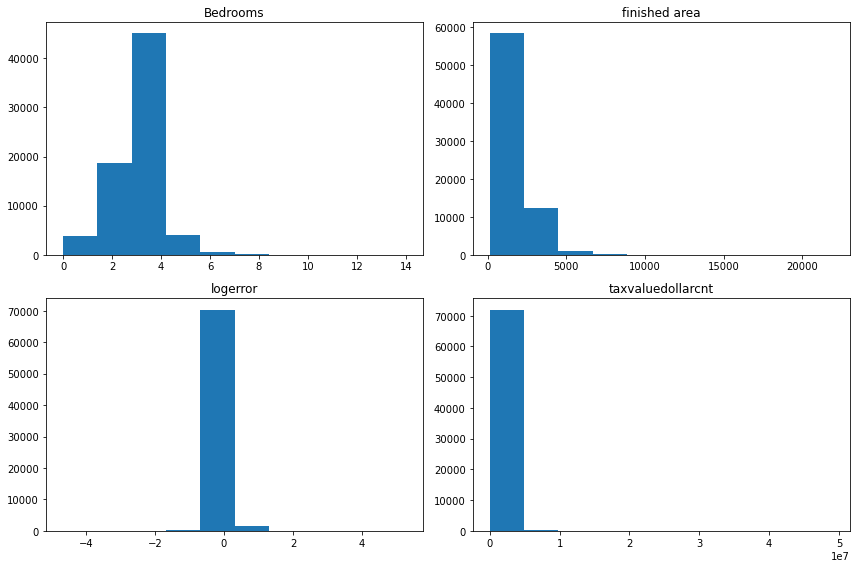

In [29]:
# plot some distributions 

plt.figure(figsize = (12,8))
plt.subplot(221)
plt.hist(df.bedroomcnt)
plt.title('Bedrooms')



plt.subplot(222)
plt.hist(df.calculatedfinishedsquarefeet)
plt.title('finished area')



plt.subplot(223)
plt.hist(df.logerror)
plt.title('logerror')



plt.subplot(224)
plt.hist(df.taxvaluedollarcnt)
plt.title('taxvaluedollarcnt')

plt.tight_layout();

In [30]:
df.isnull().sum()/df.shape[0]

id                          0.000000
parcelid                    0.000000
airconditioningtypeid       0.680519
architecturalstyletypeid    0.997148
basementsqft                0.999308
                              ...   
buildingclassdesc           1.000000
heatingorsystemdesc         0.353577
propertylandusedesc         0.000000
storydesc                   0.999308
typeconstructiondesc        0.996927
Length: 68, dtype: float64

#### Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [31]:
df.isnull().sum()/df.shape[0]

id                          0.000000
parcelid                    0.000000
airconditioningtypeid       0.680519
architecturalstyletypeid    0.997148
basementsqft                0.999308
                              ...   
buildingclassdesc           1.000000
heatingorsystemdesc         0.353577
propertylandusedesc         0.000000
storydesc                   0.999308
typeconstructiondesc        0.996927
Length: 68, dtype: float64

In [32]:
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    pct_missing = num_missing / rows
    cols_missing = pd.DataFrame({'number_missing_rows': num_missing, 'percent_rows_missing': pct_missing})
    return cols_missing

In [33]:
nulls_by_column = nulls_by_col(df)
nulls_by_column.sort_values(by="percent_rows_missing", ascending=False).head(40)


,number_missing_rows,percent_rows_missing
buildingclasstypeid,72236,1.000000
buildingclassdesc,72236,1.000000
finishedsquarefeet13,72234,0.999972
finishedsquarefeet15,72225,0.999848
storytypeid,72186,0.999308
basementsqft,72186,0.999308
storydesc,72186,0.999308
yardbuildingsqft26,72166,0.999031
finishedsquarefeet6,72069,0.997688
fireplaceflag,72064,0.997619


#### Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [34]:
def cols_missing(df):
    df2 = pd.DataFrame(df.isnull().sum(axis =1), columns = ['num_cols_missing']).reset_index()\
    .groupby('num_cols_missing').count().reset_index().\
    rename(columns = {'index': 'num_rows' })
    df2['pct_cols_missing'] = df2.num_cols_missing/df.shape[1]
    return df2

In [35]:
# sort valyes by pc_col_missing
cols_missing(df).sort_values(by = ['pct_cols_missing'], ascending = False)

,num_cols_missing,num_rows,pct_cols_missing
25,48,2,0.705882
24,47,2,0.691176
23,46,4,0.676471
22,45,46,0.661765
21,44,76,0.647059
20,43,26,0.632353
19,42,16,0.617647
18,41,15,0.602941
17,40,173,0.588235
16,39,241,0.573529


#### Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [36]:
#check data shape
df.shape

(72236, 68)

In [37]:
# look at value counts for 'unitcnt'

df.unitcnt.value_counts(dropna = False)

1.0    45413
NaN    26781
2.0       35
4.0        3
3.0        3
6.0        1
Name: unitcnt, dtype: int64

In [38]:
# Restrict df to only properties that meet single unit criteria

single_use = [261, 262, 263, 264, 266, 268, 273, 276, 279]
df = df[df.propertylandusetypeid.isin(single_use)]
    
    
# Restrict df to only those properties with at least 1 bath & bed and >350 sqft area
df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull()) & (df.calculatedfinishedsquarefeet>350)]


In [39]:
# check # of columns and rows left
df.shape

(71356, 68)

#### Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

In [40]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .70):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [41]:
# use the function defined above:

df = handle_missing_values(df)

In [42]:
# check shape to see how many columns and rows were dropped

df.shape

(71356, 34)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71356 entries, 0 to 72235
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            71356 non-null  int64  
 1   parcelid                      71356 non-null  int64  
 2   bathroomcnt                   71356 non-null  float64
 3   bedroomcnt                    71356 non-null  float64
 4   buildingqualitytypeid         44842 non-null  float64
 5   calculatedbathnbr             71341 non-null  float64
 6   calculatedfinishedsquarefeet  71356 non-null  float64
 7   finishedsquarefeet12          71189 non-null  float64
 8   fips                          71356 non-null  float64
 9   fullbathcnt                   71341 non-null  float64
 10  heatingorsystemtypeid         46413 non-null  float64
 11  latitude                      71356 non-null  float64
 12  longitude                     71356 non-null  float64
 13  l

In [44]:
# look at number of nulls for each column
df.isnull().sum()

id                                  0
parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           26514
calculatedbathnbr                  15
calculatedfinishedsquarefeet        0
finishedsquarefeet12              167
fips                                0
fullbathcnt                        15
heatingorsystemtypeid           24943
latitude                            0
longitude                           0
lotsizesquarefeet                8034
propertycountylandusecode           0
propertylandusetypeid               0
propertyzoningdesc              26221
rawcensustractandblock              0
regionidcity                     1322
regionidcounty                      0
regionidzip                        40
roomcnt                             0
unitcnt                         26195
yearbuilt                          35
structuretaxvaluedollarcnt         75
taxvaluedollarcnt                   1
assessmentye

In [45]:
# use your judgement to remove certain columns which you don't need

cols_to_remove = ['id',
       'calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt', 'heatingorsystemtypeid'
       ,'propertycountylandusecode', 'propertylandusetypeid','propertyzoningdesc', 
        'censustractandblock', 'propertylandusedesc']

In [46]:
def remove_columns(df, cols_to_remove):  
    df = df.drop(columns=cols_to_remove)
    return df

In [47]:
# use the function defined above to remove the columns not needed:

df = remove_columns(df, cols_to_remove)

In [48]:
# take a look at null counts again

df.isnull().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           26514
calculatedfinishedsquarefeet        0
fips                                0
latitude                            0
longitude                           0
lotsizesquarefeet                8034
rawcensustractandblock              0
regionidcity                     1322
regionidcounty                      0
regionidzip                        40
roomcnt                             0
unitcnt                         26195
yearbuilt                          35
structuretaxvaluedollarcnt         75
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvaluedollarcnt               1
taxamount                           5
logerror                            0
transactiondate                     0
heatingorsystemdesc             24943
dtype: int64

In [49]:
# let's look at heatingorsystemdesc value counts

df.heatingorsystemdesc.value_counts(dropna = False)

Central       31357
NaN           24943
Floor/Wall    13230
Yes             850
Forced air      775
Solar           101
None             60
Radiant          23
Baseboard        13
Gravity           3
Heat Pump         1
Name: heatingorsystemdesc, dtype: int64

In [50]:
# I assume that since this is Southern CA, 'null' probably means 'None' for heating system

df.heatingorsystemdesc.fillna('None', inplace = True)

In [51]:
df.unitcnt.value_counts(dropna = False)

1.0    45161
NaN    26195
Name: unitcnt, dtype: int64

In [52]:
# For unit counts, I will fill 'NaN' with unit count of 1

df.unitcnt.fillna(1, inplace = True)

In [53]:
# buildingqualitytypeid
# Overall assessment of condition of the building from 
# low number = best quality
# higher numbersw = worse quality

df.buildingqualitytypeid.value_counts(dropna = False)

NaN     26514
8.0     13404
6.0     12673
4.0      8227
7.0      5505
9.0      2113
5.0      1499
11.0      846
10.0      301
3.0       149
12.0      113
1.0         9
2.0         3
Name: buildingqualitytypeid, dtype: int64

<AxesSubplot:>

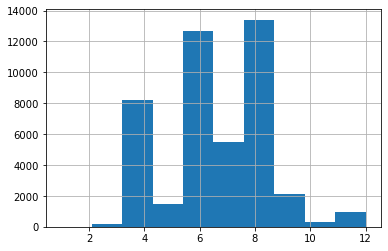

In [54]:
# look at distrubition of buildingqualitytypeid

df.buildingqualitytypeid.hist()

In [55]:
# what is the median value of buildingqualitytypeid?

df.buildingqualitytypeid.median()

6.0

In [56]:
# fill missing values for buildingqualitytypeid with median value
df.buildingqualitytypeid.fillna(6.0, inplace = True)

In [57]:
df.isnull().sum()

parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
buildingqualitytypeid              0
calculatedfinishedsquarefeet       0
fips                               0
latitude                           0
longitude                          0
lotsizesquarefeet               8034
rawcensustractandblock             0
regionidcity                    1322
regionidcounty                     0
regionidzip                       40
roomcnt                            0
unitcnt                            0
yearbuilt                         35
structuretaxvaluedollarcnt        75
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          5
logerror                           0
transactiondate                    0
heatingorsystemdesc                0
dtype: int64

<AxesSubplot:>

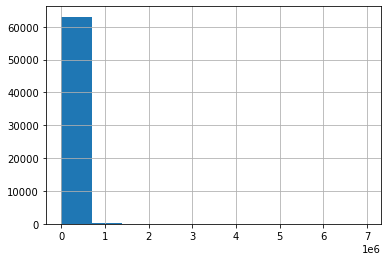

In [58]:
# look at lot-size distribution
df.lotsizesquarefeet.hist()

In [59]:
# what is the median lot size?

df.lotsizesquarefeet.median()

7313.0

In [60]:
# fill missing values with median null sizes

df.lotsizesquarefeet.fillna(7313, inplace = True)

In [61]:
df.isnull().sum()

parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
buildingqualitytypeid              0
calculatedfinishedsquarefeet       0
fips                               0
latitude                           0
longitude                          0
lotsizesquarefeet                  0
rawcensustractandblock             0
regionidcity                    1322
regionidcounty                     0
regionidzip                       40
roomcnt                            0
unitcnt                            0
yearbuilt                         35
structuretaxvaluedollarcnt        75
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          5
logerror                           0
transactiondate                    0
heatingorsystemdesc                0
dtype: int64

In [62]:
# I am going to drop the rest of nulls 

df.dropna(inplace = True)

In [63]:
# How many rows and columns are left?

df.shape

(69920, 24)

In [64]:
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc
0,10711855,2.0,3.0,8.0,2107.0,6037.0,34222559.0,-118617387.0,9158.0,6.037113e+07,...,1.0,1972.0,249655.0,624139.0,2016.0,374484.0,7659.36,-0.007357,2017-07-07,Central
1,10711877,2.0,4.0,8.0,1882.0,6037.0,34220261.0,-118616409.0,9035.0,6.037113e+07,...,1.0,1972.0,253000.0,660000.0,2016.0,407000.0,8123.91,0.021066,2017-08-29,Central
2,10711888,2.0,4.0,8.0,1882.0,6037.0,34222491.0,-118616854.0,9800.0,6.037113e+07,...,1.0,1972.0,257591.0,542923.0,2016.0,285332.0,6673.24,0.077174,2017-04-04,Central
3,10711910,2.0,3.0,8.0,1477.0,6037.0,34221864.0,-118615739.0,11285.0,6.037113e+07,...,1.0,1960.0,57968.0,78031.0,2016.0,20063.0,1116.46,-0.041238,2017-03-17,Central
4,10711923,2.0,4.0,8.0,1918.0,6037.0,34220619.0,-118615253.0,11239.0,6.037113e+07,...,1.0,1960.0,167869.0,415459.0,2016.0,247590.0,5239.85,-0.009496,2017-03-24,Central


### Check for outliers in select columns

<AxesSubplot:ylabel='taxvaluedollarcnt'>

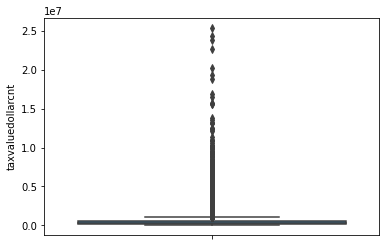

In [65]:
# plt.subplot(221)
sns.boxplot(y = 'taxvaluedollarcnt', data = df)

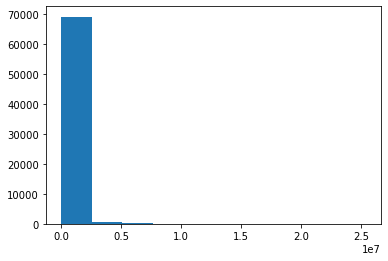

In [66]:
#Histograms for taxvalue of properties

plt.hist(df.taxvaluedollarcnt);

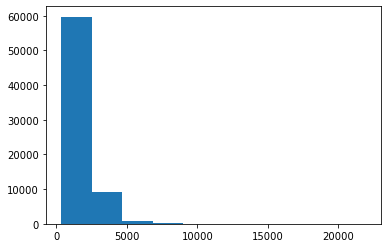

In [67]:
#Histograms for covered sq ft of properties

plt.hist(df.calculatedfinishedsquarefeet);

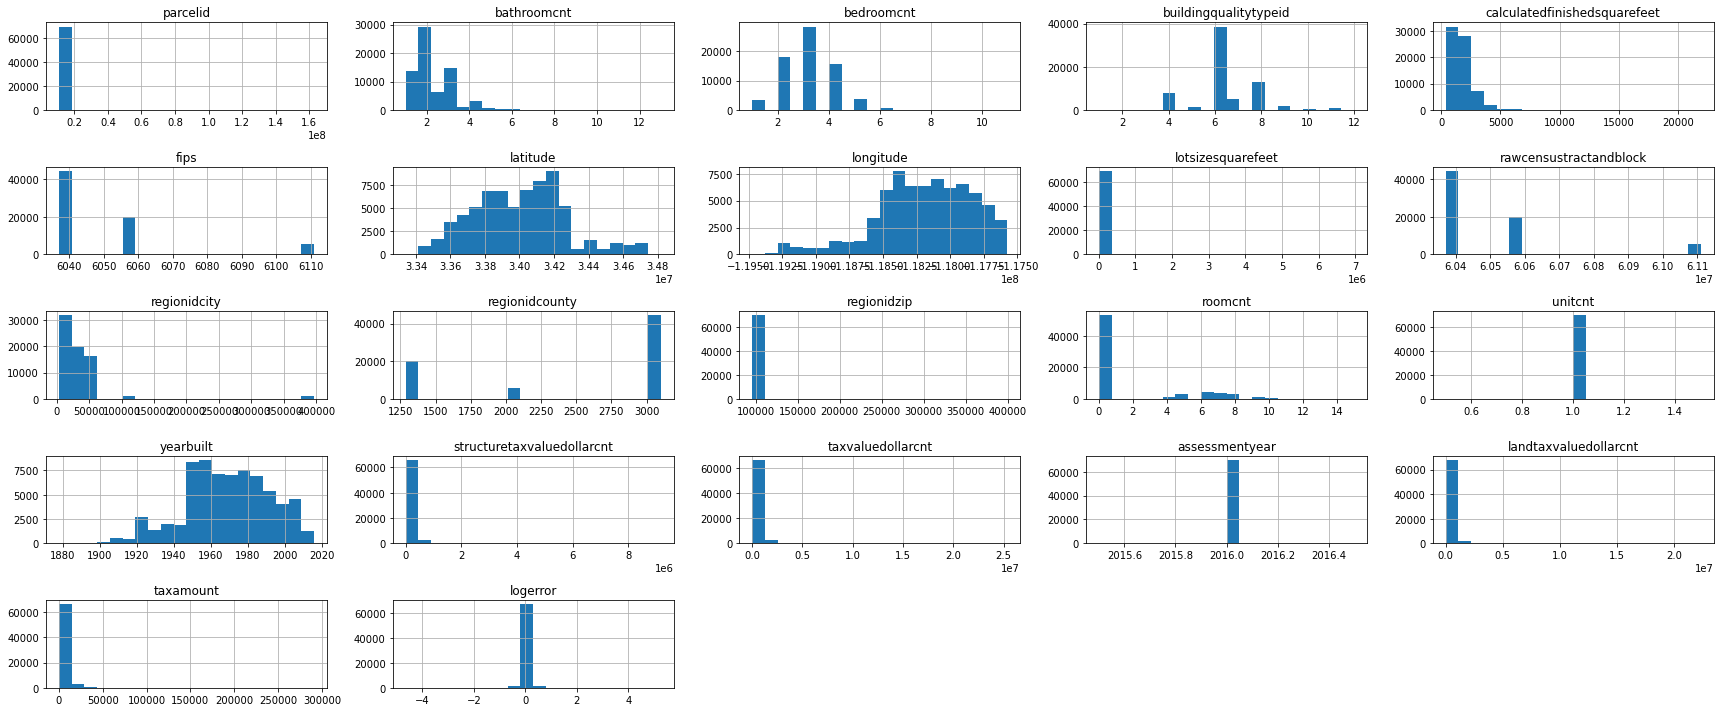

In [68]:
# look at distributions for all columns

df.hist(figsize=(24, 10), bins=20)
plt.tight_layout();

In [69]:
# Remove properties valued more than 5 million dollars

df = df[df.taxvaluedollarcnt < 5_000_000]
df.shape

(69730, 24)

In [70]:
# Remove properties valued more than 8000 square feet

df[df.calculatedfinishedsquarefeet < 8000]
df.shape

(69730, 24)

In [73]:
# Function to read and wrangle data:

def wrangle_zillow():
    df = acquire.get_zillow_data()
    
    # Restrict df to only properties that meet single unit use criteria
    single_use = [261, 262, 263, 264, 266, 268, 273, 276, 279]
    df = df[df.propertylandusetypeid.isin(single_use)]
    
    # Restrict df to only those properties with at least 1 bath & bed and 350 sqft area
    df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull())\
            & (df.calculatedfinishedsquarefeet>350)]

    # Handle missing values i.e. drop columns and rows based on a threshold
    df = handle_missing_values(df)
    
    # Add column for counties
    df['county'] = np.where(df.fips == 6037, 'Los_Angeles',
                           np.where(df.fips == 6059, 'Orange', 
                                   'Ventura'))    
    # drop columns not needed
    df = remove_columns(df, ['id',
       'calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt', 'heatingorsystemtypeid'
       ,'propertycountylandusecode', 'propertylandusetypeid','propertyzoningdesc', 
        'censustractandblock', 'propertylandusedesc'])


    # replace nulls in unitcnt with 1
    df.unitcnt.fillna(1, inplace = True)
    
    # assume that since this is Southern CA, null means 'None' for heating system
    df.heatingorsystemdesc.fillna('None', inplace = True)
    
    # replace nulls with median values for select columns
    df.lotsizesquarefeet.fillna(7313, inplace = True)
    df.buildingqualitytypeid.fillna(6.0, inplace = True)

    # Columns to look for outliers
    df = df[df.taxvaluedollarcnt < 5_000_000]
    df[df.calculatedfinishedsquarefeet < 8000]
    
    # Just to be sure we caught all nulls, drop them here
    df = df.dropna()
    
    return df

In [74]:
df = wrangle_zillow()
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county
0,10711855,2.0,3.0,8.0,2107.0,6037.0,34222559.0,-118617387.0,9158.0,6.037113e+07,...,1972.0,249655.0,624139.0,2016.0,374484.0,7659.36,-0.007357,2017-07-07,Central,Los_Angeles
1,10711877,2.0,4.0,8.0,1882.0,6037.0,34220261.0,-118616409.0,9035.0,6.037113e+07,...,1972.0,253000.0,660000.0,2016.0,407000.0,8123.91,0.021066,2017-08-29,Central,Los_Angeles
2,10711888,2.0,4.0,8.0,1882.0,6037.0,34222491.0,-118616854.0,9800.0,6.037113e+07,...,1972.0,257591.0,542923.0,2016.0,285332.0,6673.24,0.077174,2017-04-04,Central,Los_Angeles
3,10711910,2.0,3.0,8.0,1477.0,6037.0,34221864.0,-118615739.0,11285.0,6.037113e+07,...,1960.0,57968.0,78031.0,2016.0,20063.0,1116.46,-0.041238,2017-03-17,Central,Los_Angeles
4,10711923,2.0,4.0,8.0,1918.0,6037.0,34220619.0,-118615253.0,11239.0,6.037113e+07,...,1960.0,167869.0,415459.0,2016.0,247590.0,5239.85,-0.009496,2017-03-24,Central,Los_Angeles


In [75]:
df.shape

(69730, 25)

### Mall Customers

In [76]:
sql = 'select * from customers'

In [77]:
# acquire mall customers data using the query:

def get_mall_customers(sql):
    url = get_db_url('mall_customers')
    mall_df = pd.read_sql(sql, url, index_col='customer_id')
    return mall_df

In [78]:
# acquire data

mall_df = get_mall_customers(sql)

In [79]:
mall_df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [80]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [81]:
mall_df.shape

(200, 4)

In [82]:
mall_df.describe()

,age,annual_income,spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [83]:
mall_df.isnull().sum()

gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [84]:
mall_df.gender.value_counts()

Female    112
Male       88
Name: gender, dtype: int64

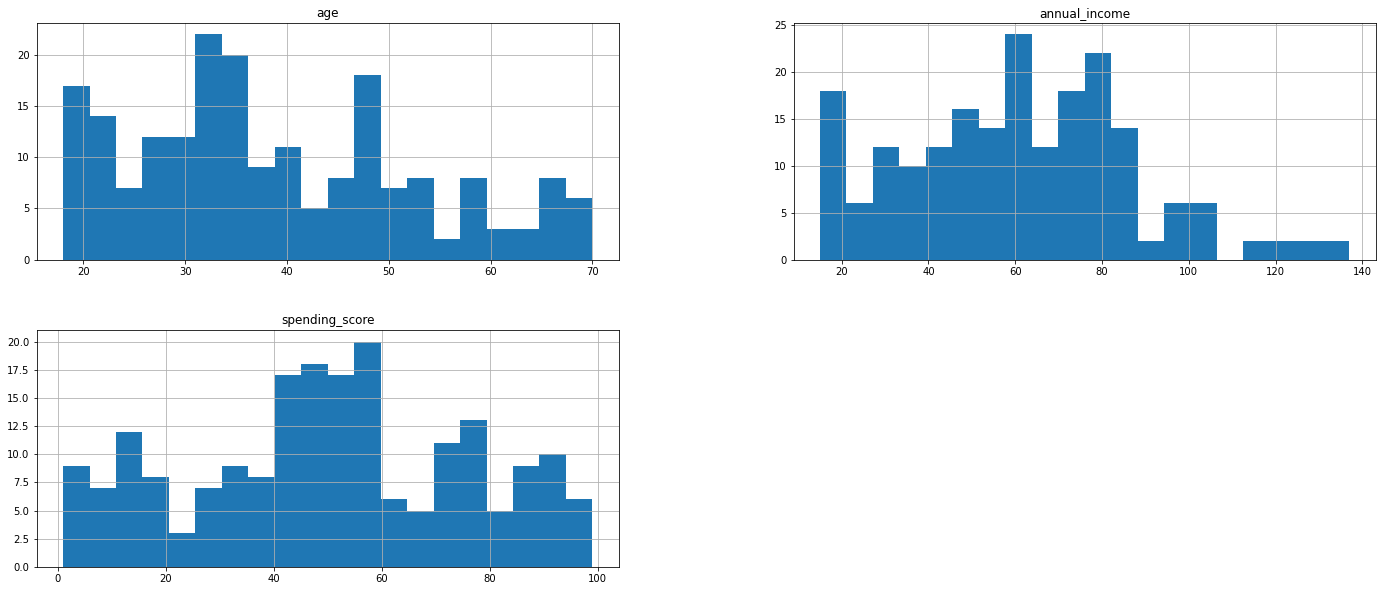

In [85]:
mall_df.hist(figsize=(24, 10), bins=20);

<AxesSubplot:ylabel='spending_score'>

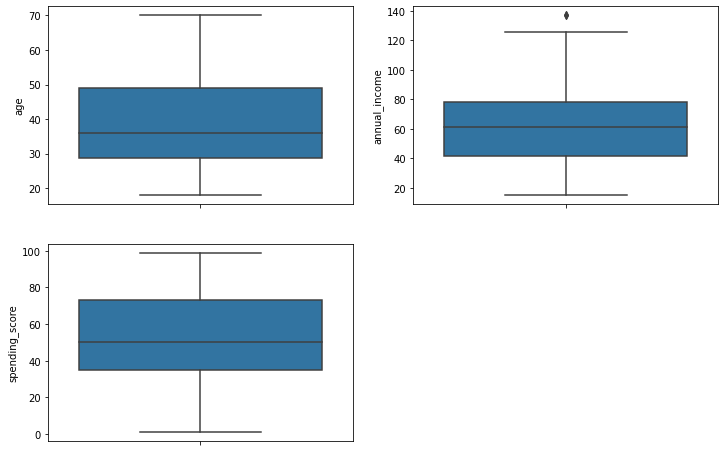

In [86]:
# visualize outliers using boxplots:

plt.figure(figsize = (12,8))
plt.subplot(221)
sns.boxplot(y = mall_df.age)

plt.subplot(222)
sns.boxplot(y = mall_df.annual_income)

plt.subplot(223)
sns.boxplot(y = mall_df.spending_score)

Seems like we have only few outliers based on income column

In [87]:
# Calculate q1, q3 and iqr for income

q1 = mall_df.annual_income.quantile(0.25)
q3 = mall_df.annual_income.quantile(0.75)
iqr = q3 - q1
k = 1.5

# calculate upper and lower ranges
upper_bound_income =  q3 + k * iqr
lower_bound_income =  q1 - k * iqr

upper_bound_income

132.75

In [88]:
# function to detect and eliminate outliers using IQR rule

def outlier_function(df, cols, k):
    for col in df[cols]:
        q1 = mall_df.annual_income.quantile(0.25)
        q3 = mall_df.annual_income.quantile(0.75)
        iqr = q3 - q1
        upper_bound =  q3 + k * iqr
        lower_bound =  q1 - k * iqr     
        df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]
    return df

In [89]:
# use the outlier function defined above to handle outliers in numeric columns. k = 1.5

mall_df = outlier_function(mall_df, ['age', 'spending_score', 'annual_income'], 1.5)
mall_df.shape

(198, 4)

In [90]:
# encode the gender column

dummy_df = pd.get_dummies(mall_df.gender, drop_first=True)
dummy_df.head()

,Male
customer_id,
1,1
2,1
3,0
4,0
5,0


In [91]:
# concat the dummies df with original df. Drop the 'gender' column

mall_df = pd.concat([mall_df, dummy_df], axis=1).drop(columns = ['gender'])
mall_df.head()

,age,annual_income,spending_score,Male
customer_id,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


#### Split data (train, validate, and test split).


In [92]:
train, test = train_test_split(mall_df, train_size = 0.8, random_state = 123)
train, validate = train_test_split(train, train_size = 0.75, random_state = 123)

In [93]:
# check shape
train.shape, validate.shape, test.shape

((118, 4), (40, 4), (40, 4))

Encode categorical columns using a one hot encoder (pd.get_dummies).

#### Scaling numeric columns

In [94]:
def min_max_scaler(train, valid, test):
    '''
    Uses the train & test datasets created by the split_my_data function
    Returns 3 items: mm_scaler, train_scaled_mm, test_scaled_mm
    This is a linear transformation. Values will lie between 0 and 1
    '''
    num_vars = list(train.select_dtypes('number').columns)
    scaler = MinMaxScaler(copy=True, feature_range=(0,1))
    train[num_vars] = scaler.fit_transform(train[num_vars])
    valid[num_vars] = scaler.transform(valid[num_vars])
    test[num_vars] = scaler.transform(test[num_vars])
    return scaler, train, valid, test

In [95]:
train.select_dtypes('number').columns

Index(['age', 'annual_income', 'spending_score', 'Male'], dtype='object')

In [96]:
# use the scaler
scaler, train_scaled, validate_scaled, test_scaled = min_max_scaler(train, validate, test)

In [97]:
train_scaled.head()

,age,annual_income,spending_score,Male
customer_id,,,,
182,0.269231,0.738739,0.867347,0.0
49,0.211538,0.225225,0.418367,0.0
35,0.596154,0.162162,0.132653,0.0
186,0.230769,0.756757,0.979592,1.0
114,0.019231,0.441441,0.459184,1.0


In [98]:
# Write a master wrangle fuction which acquires and prepares the data

def wrangle_mall_df():
    
    # acquire data
    sql = 'select * from customers'
    mall_df = get_mall_customers(sql)
    
    # handle outliers
    mall_df = outlier_function(mall_df, ['age', 'spending_score', 'annual_income'], 1.5)
    
    # get dummy for gender column
    dummy_df = pd.get_dummies(mall_df.gender, drop_first=True)
    mall_df = pd.concat([mall_df, dummy_df], axis=1).drop(columns = ['gender'])

    # split the data in train, validate and test
    train, test = train_test_split(mall_df, train_size = 0.8, random_state = 123)
    train, validate = train_test_split(train, train_size = 0.75, random_state = 123)
    
    return min_max_scaler(train, validate, test)

In [99]:
# use the wrangle function:

scaler, train_scaled, validate_scaled, test_scaled = wrangle_mall_df()

In [100]:
train_scaled.head(3)

,age,annual_income,spending_score,Male
customer_id,,,,
182,0.269231,0.738739,0.867347,0.0
49,0.211538,0.225225,0.418367,0.0
35,0.596154,0.162162,0.132653,0.0


In [101]:
# check shape of scaled dfs

train_scaled.shape, validate_scaled.shape, test_scaled.shape

((118, 4), (40, 4), (40, 4))

In [103]:
# check if wrangle.py works as intended for zillow data:

wrangle_zillow()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county
0,10711855,2.0,3.0,8.0,2107.0,6037.0,34222559.0,-118617387.0,9158.0,6.037113e+07,...,1972.0,249655.0,624139.0,2016.0,374484.0,7659.36,-0.007357,2017-07-07,Central,Los_Angeles
1,10711877,2.0,4.0,8.0,1882.0,6037.0,34220261.0,-118616409.0,9035.0,6.037113e+07,...,1972.0,253000.0,660000.0,2016.0,407000.0,8123.91,0.021066,2017-08-29,Central,Los_Angeles
2,10711888,2.0,4.0,8.0,1882.0,6037.0,34222491.0,-118616854.0,9800.0,6.037113e+07,...,1972.0,257591.0,542923.0,2016.0,285332.0,6673.24,0.077174,2017-04-04,Central,Los_Angeles
3,10711910,2.0,3.0,8.0,1477.0,6037.0,34221864.0,-118615739.0,11285.0,6.037113e+07,...,1960.0,57968.0,78031.0,2016.0,20063.0,1116.46,-0.041238,2017-03-17,Central,Los_Angeles
4,10711923,2.0,4.0,8.0,1918.0,6037.0,34220619.0,-118615253.0,11239.0,6.037113e+07,...,1960.0,167869.0,415459.0,2016.0,247590.0,5239.85,-0.009496,2017-03-24,Central,Los_Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72210,93577187,2.0,2.0,6.0,900.0,6111.0,34212400.0,-119027000.0,7313.0,6.111006e+07,...,2006.0,108211.0,309621.0,2016.0,201410.0,3280.22,0.018730,2017-03-15,None,Ventura
72211,162960516,2.5,3.0,6.0,1449.0,6111.0,34273914.0,-119164501.0,6926.0,6.111001e+07,...,1986.0,288913.0,481521.0,2016.0,192608.0,5063.30,0.015797,2017-05-08,None,Ventura
72212,162960529,4.0,4.0,6.0,2459.0,6111.0,34245590.0,-119169692.0,5400.0,6.111005e+07,...,2007.0,169000.0,479000.0,2016.0,310000.0,12285.88,0.007117,2017-05-26,None,Ventura
72213,162960596,2.0,4.0,6.0,1379.0,6111.0,34219587.0,-119042663.0,7343.0,6.111006e+07,...,1960.0,224567.0,449134.0,2016.0,224567.0,4787.16,0.032018,2017-07-18,None,Ventura


In [105]:
# check if wrangle.py works as intended for mall_customers:


scaler, train_scaled, validate_scaled, test_scaled = wrangle_mall_df()

In [106]:
train_scaled.head(3)

,age,annual_income,spending_score,Male
customer_id,,,,
182,0.269231,0.738739,0.867347,0.0
49,0.211538,0.225225,0.418367,0.0
35,0.596154,0.162162,0.132653,0.0
